<a href="https://colab.research.google.com/github/mikehviz/Product-Profit-Forecasting/blob/main/Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

install.packages("tseries")
install.packages("forecast")
#install.packages("lubridate")
library(tseries)
library(forecast)
#library(lubridate)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘zoo’, ‘quantmod’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘urca’, ‘RcppArmadillo’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [ ]:
sales <- read.csv("https://docs.google.com/spreadsheets/d/186CbIZOGYm99e_52B1FSpIiw8zF0nevgBn3SmwvtL4M/export?format=csv")
head(sales, 3)

,date,R03
,<chr>,<int>
1,1992-01-01,1509
2,1992-02-01,1541
3,1992-03-01,1597


In [ ]:
  sales$date <- as.Date(sales$date)   
class(sales$date)

[1] "Date"

In [ ]:
head(sales, 3)

,date,R03
,<date>,<int>
1,1992-01-01,1509
2,1992-02-01,1541
3,1992-03-01,1597


In [ ]:
min(sales$date, na.rm = TRUE)

max(sales$date, na.rm = TRUE)

[1] "1992-01-01"

[1] "2018-12-01"

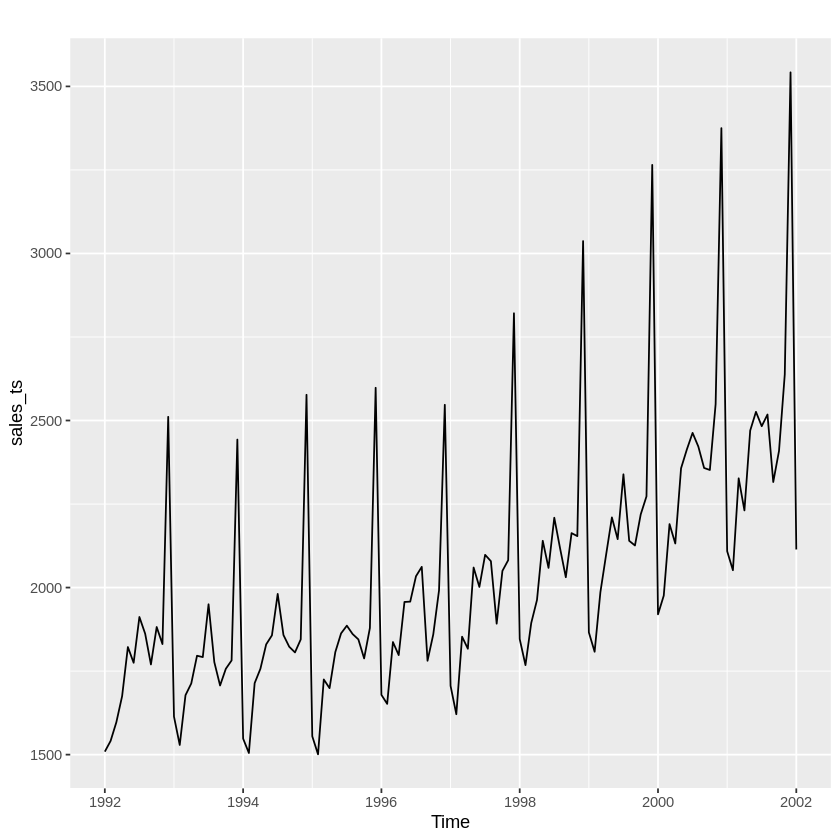

In [ ]:
sales_ts <- ts(sales$R03, start=c(1992), end=c(2002), frequency = 12) 
autoplot(sales_ts)

In [ ]:
adf.test(sales_ts, k=12)


	Augmented Dickey-Fuller Test

data:  sales_ts
Dickey-Fuller = -2.0728, Lag order = 12, p-value = 0.5463
alternative hypothesis: stationary


In [ ]:
sales_ts_1 <- diff(sales_ts, differences = 1)
adf.test(sales_ts_1, k=12)


	Augmented Dickey-Fuller Test

data:  sales_ts_1
Dickey-Fuller = -3.8745, Lag order = 12, p-value = 0.01773
alternative hypothesis: stationary


In [ ]:
sales_ts_2 <- diff(sales_ts_1, differences = 1)
adf.test(sales_ts_2, k=12)

Warning message in adf.test(sales_ts_2, k = 12):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  sales_ts_2
Dickey-Fuller = -12.212, Lag order = 12, p-value = 0.01
alternative hypothesis: stationary


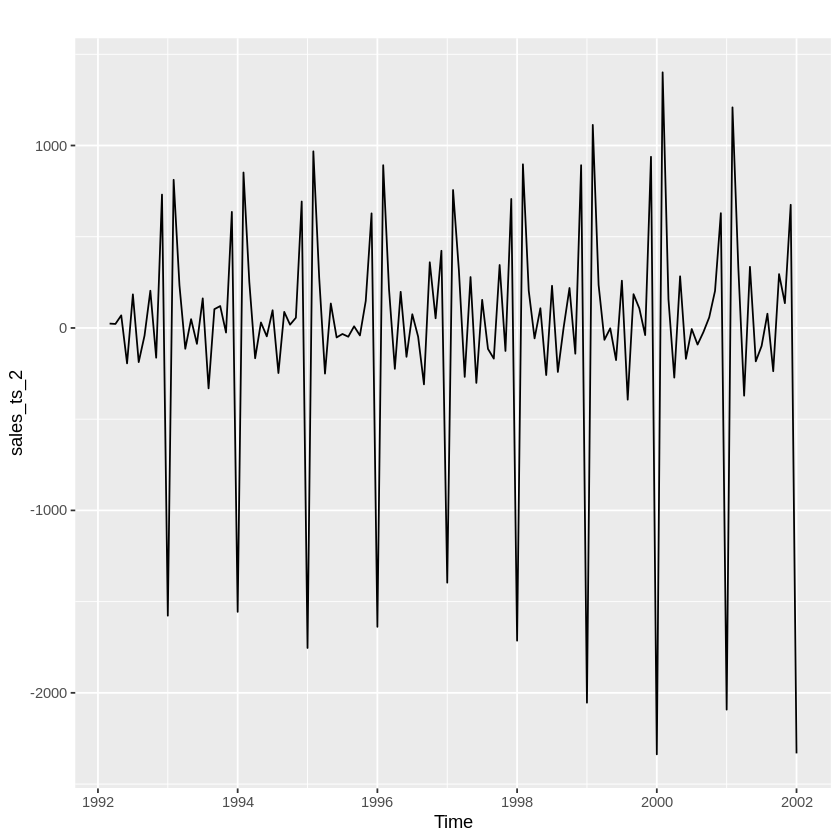

In [ ]:
autoplot(sales_ts_2)

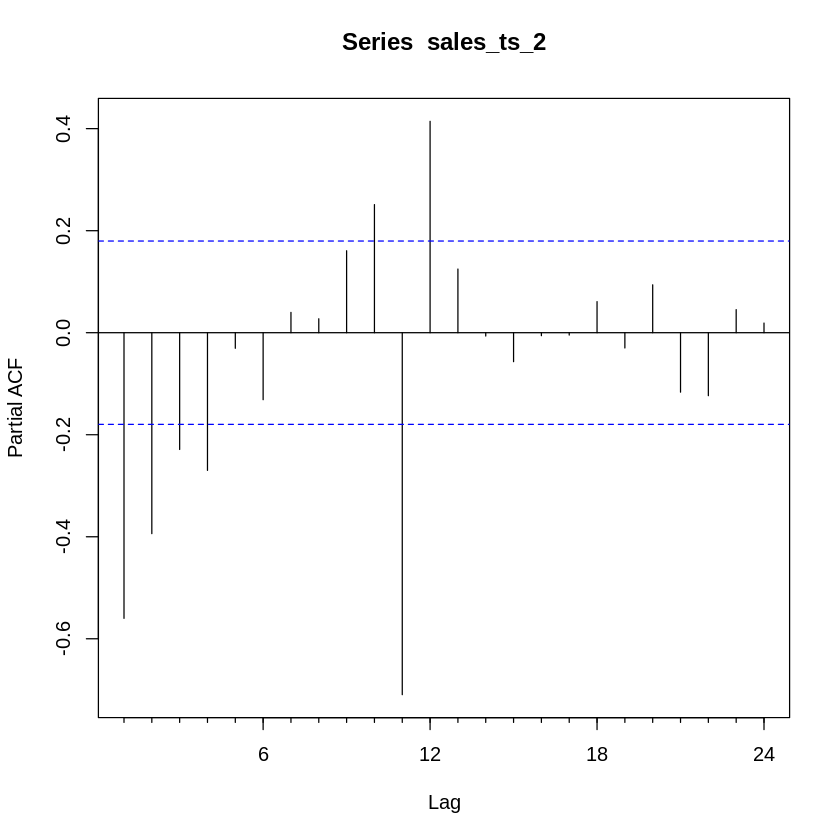

In [ ]:
Pacf(sales_ts_2)

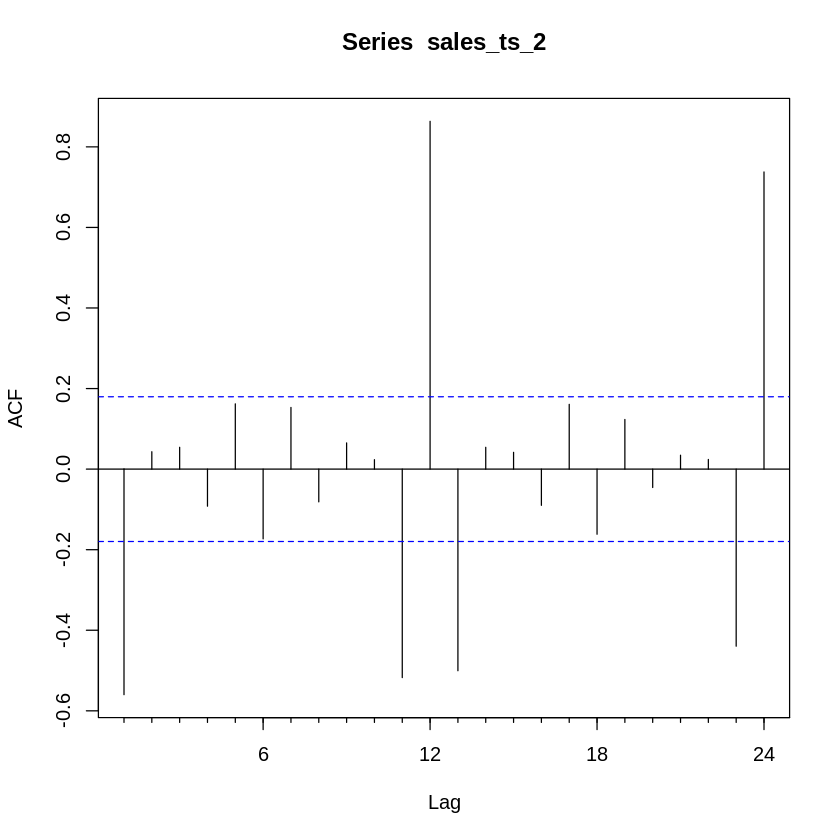

In [ ]:
Acf(sales_ts_2)

In [ ]:

tsMod <- Arima(y = sales_ts, order = c(3,2,6))
print(tsMod)

Series: sales_ts 
ARIMA(3,2,6) 

Coefficients:
          ar1      ar2      ar3      ma1     ma2      ma3     ma4     ma5
      -0.3985  -0.5302  -0.0374  -1.7097  0.7594  -0.8720  0.8082  0.5866
s.e.   0.2278   0.1487   0.2269   0.2210  0.4092   0.3533  0.4316  0.3717
          ma6
      -0.5658
s.e.   0.1411

sigma^2 = 58815:  log likelihood = -829.19
AIC=1678.39   AICc=1680.42   BIC=1706.18


In [ ]:
forecast(tsMod, h=12)

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Feb 2002       2379.133 2063.386 2694.880 1896.240 2862.027
Mar 2002       2481.357 2164.233 2798.481 1996.357 2966.357
Apr 2002       2631.550 2311.105 2951.995 2141.472 3121.628
May 2002       2910.454 2568.303 3252.606 2387.178 3433.731
Jun 2002       2538.267 2187.882 2888.653 2002.399 3074.136
Jul 2002       2558.844 2187.940 2929.747 1991.596 3126.091
Aug 2002       2763.287 2391.582 3134.991 2194.814 3331.760
Sep 2002       2710.610 2336.656 3084.563 2138.697 3282.522
Oct 2002       2648.200 2272.934 3023.467 2074.280 3222.121
Nov 2002       2719.103 2341.387 3096.820 2141.436 3296.771
Dec 2002       2751.672 2373.928 3129.416 2173.963 3329.381
Jan 2003       2729.201 2351.230 3107.172 2151.144 3307.258

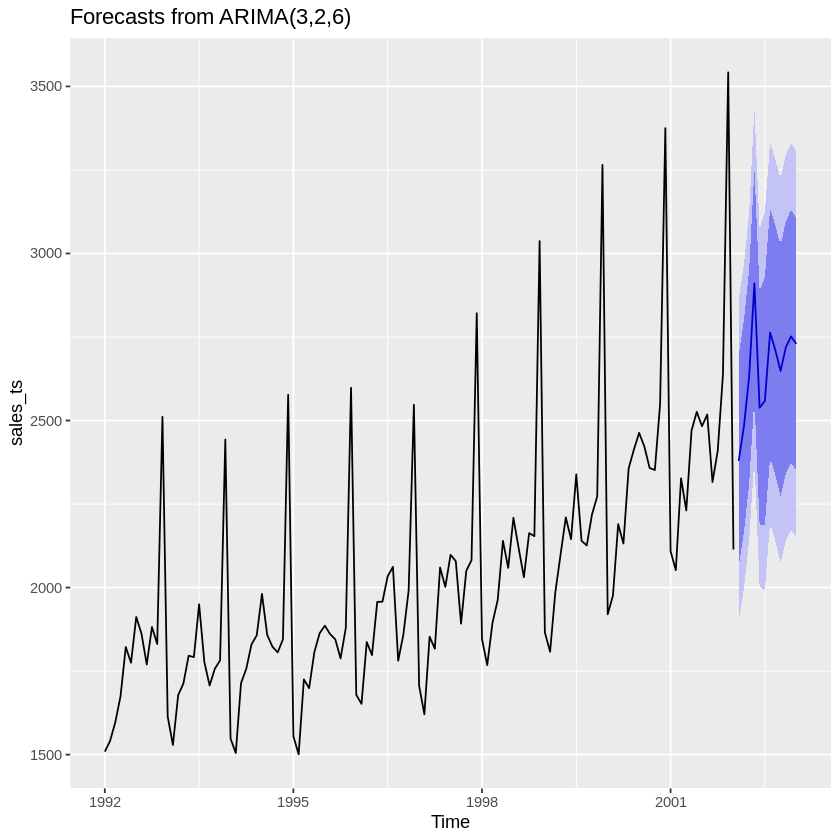

In [ ]:
autoplot(forecast(tsMod,h=12))